## Task 1

### Question

Consider polynomial regression models for the target variable `mpg` based on the input variable `horsepower`. Train these models and provide plots to depict the fit of them on the training data.

### Solution

#### Loading Libraries

First, we load the necessary libraries and set a seed for reproducibility.


In [1]:
set.seed(100)
library(ISLR2)      # Contains the 'Auto' dataset
library(mlr3verse) # Machine learning tools

Loading required package: mlr3



In [2]:
library("RColorBrewer")
colours<-brewer.pal(n = 12, name = "Paired")

#### Reading and Exploring the Data

We import the data and explore its structure.

In [3]:
Auto <- ISLR2::Auto
summary(Auto)
dim(Auto)
head(Auto)
str(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

[1] 392   9

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 - attr(*, "na.action")= 'omit' Named int [1:5] 33 127 331 337 355
  ..- attr(*, "names")= chr [1:5] "33" "127" "331" "337" ...


#### Visualizing the Target Variable

We visualize the distribution of `mpg` to understand its variability.


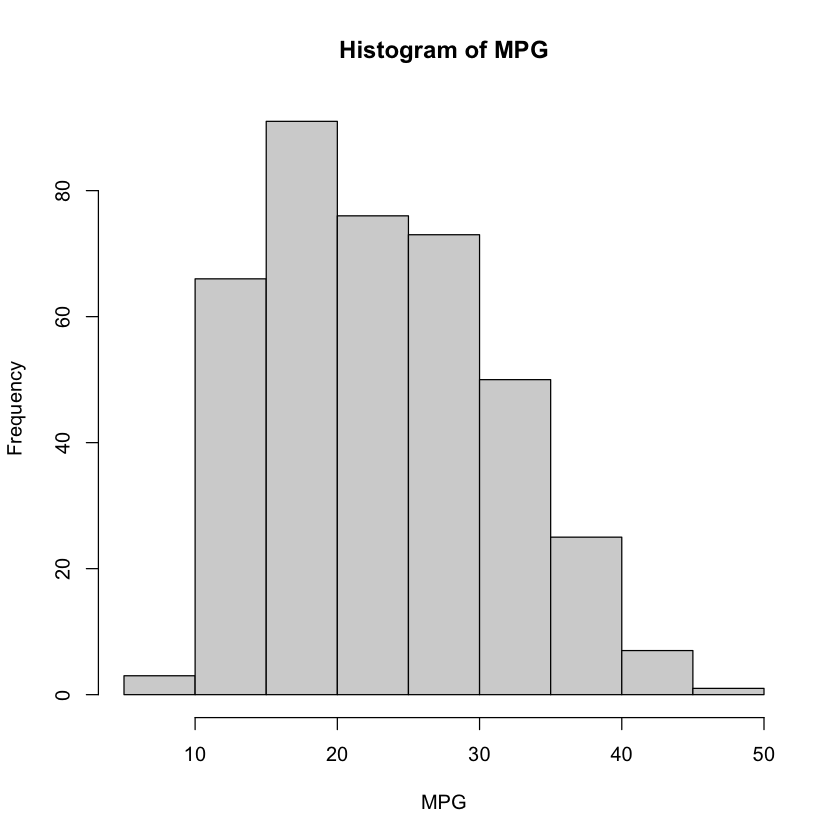

In [4]:
hist(Auto$mpg, main = "Histogram of MPG", xlab = "MPG")

#### Sorting the Data by Horsepower


In [5]:
Auto_sorted <- Auto[order(Auto$horsepower), ]
Auto_sorted

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
20,26.0,4,97,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
103,26.0,4,97,46,1950,21.0,73,2,volkswagen super beetle
245,43.1,4,90,48,1985,21.5,78,2,volkswagen rabbit custom diesel
326,44.3,4,90,48,2085,21.7,80,2,vw rabbit c (diesel)
327,43.4,4,90,48,2335,23.7,80,2,vw dasher (diesel)
118,29.0,4,68,49,1867,19.5,73,2,fiat 128
145,31.0,4,76,52,1649,16.5,74,3,toyota corona
196,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
247,32.8,4,78,52,1985,19.4,78,3,mazda glc deluxe


#### Defining Input and Target Variables

We define `horsepower` as our input variable `x` and `mpg` as our target variable `y`.

In [6]:
x <- Auto_sorted$horsepower
y <- Auto_sorted$mpg

#### Fitting Polynomial Regression Models

##### Linear Model (Degree 1)

We fit a linear regression model.

In [7]:
fit1 <- lm(y ~ x)
summary(fit1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
x           -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


##### Cubic Model (Degree 3)

We fit a cubic polynomial regression model.

In [8]:
fit3 <- lm(y ~ x + I(x^2) + I(x^3))
summary(fit3)


Call:
lm(formula = y ~ x + I(x^2) + I(x^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7039  -2.4491  -0.1519   2.2035  15.8159 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.068e+01  4.563e+00  13.298  < 2e-16 ***
x           -5.689e-01  1.179e-01  -4.824 2.03e-06 ***
I(x^2)       2.079e-03  9.479e-04   2.193   0.0289 *  
I(x^3)      -2.147e-06  2.378e-06  -0.903   0.3673    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.375 on 388 degrees of freedom
Multiple R-squared:  0.6882,	Adjusted R-squared:  0.6858 
F-statistic: 285.5 on 3 and 388 DF,  p-value: < 2.2e-16


#### Defining Functions for Predictions

We create functions to generate predictions for plotting.


In [9]:
pol1 <- function(x) predict(fit1, data.frame(x = x))
pol3 <- function(x) predict(fit3, data.frame(x = x))

#### Plotting the Models

We plot the data and overlay the fitted models.

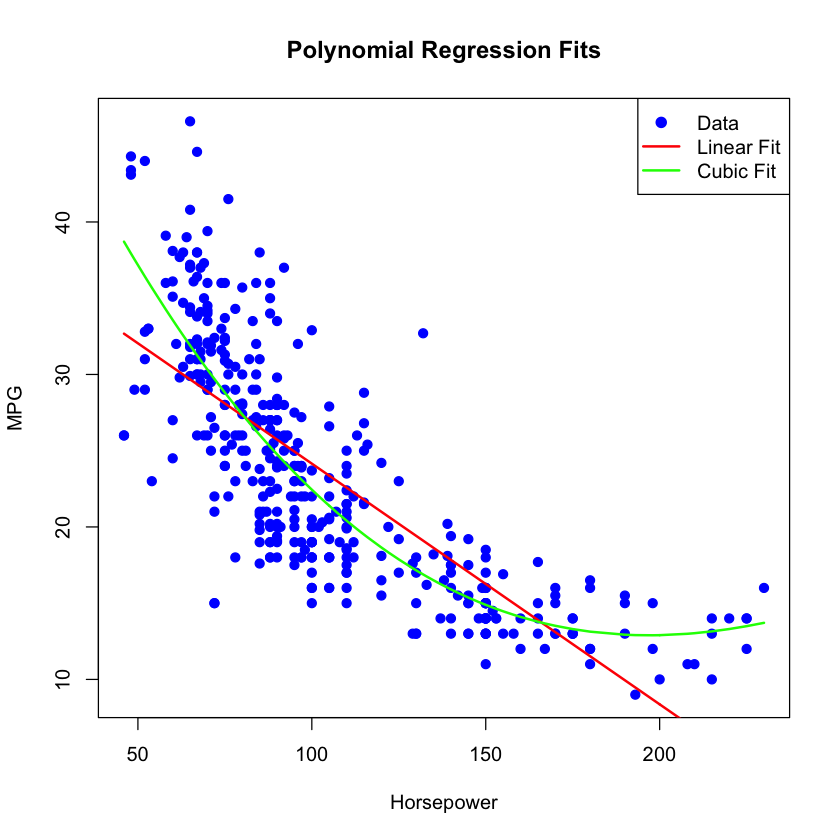

In [10]:
plot(x, y, col = "blue", pch = 19, xlab = "Horsepower", ylab = "MPG", main = "Polynomial Regression Fits")
lines(x, pol1(x), col = "red", lwd = 2)
lines(x, pol3(x), col = "green", lwd = 2)
legend("topright", legend = c("Data", "Linear Fit", "Cubic Fit"), col = c("blue", "red", "green"), pch = c(19, NA, NA), lty = c(NA, 1, 1), lwd = 2)


**Explanation:**

- **Linear Fit**: A straight line attempting to capture the relationship between `horsepower` and `mpg`.
- **Cubic Fit**: A more flexible curve that can capture nonlinear relationships.


#### Calculating Mean Squared Errors

We compute the mean squared error (MSE) for each model to assess their fit.


In [11]:
mse1 <- mean((y - pol1(x))^2)
mse3 <- mean((y - pol3(x))^2)
print(paste("MSE for Linear Model:", round(mse1, 2)))
print(paste("MSE for Cubic Model:", round(mse3, 2)))

[1] "MSE for Linear Model: 23.94"
[1] "MSE for Cubic Model: 18.94"


**Interpretation:**

- The cubic model has a lower MSE, indicating a better fit to the data.
- However, we need to be cautious about overfitting, which we'll address in Task 2.

## Task 2

### Question

Compare polynomial regression models of different orders and identify the best among them in terms of test error. Use cross-validation for the estimation of the test error.


### Solution

#### Preparing the Data and Tasks

We create regression tasks for polynomial degrees 1, 2, 3, and 9.

In [12]:
tasks <- list()
degrees <- c(1, 2, 3, 9)
for (degree in degrees) {
    data <- data.frame(y = y, x = x)
    if (degree > 1) {
for (d in 2:degree) {
    data[[paste0("x", d)]] <- x^d
}
}
task <- TaskRegr$new(id = paste0("poly", degree), backend = data, target = "y")
tasks[[paste0("poly", degree)]] <- task
}

#### Defining the Learner and Resampling Strategy

We use linear regression and 3-fold cross-validation.

In [13]:
learner <- lrn("regr.lm")
resampling <- rsmp("cv", folds = 3)

#### Benchmarking the Models

We set up a benchmark experiment to compare models.

In [14]:
design <- benchmark_grid(
    tasks = tasks,
    learners = learner,
    resamplings = resampling
)
bmr <- benchmark(design)

INFO  [23:37:03.374] [mlr3] Running benchmark with 12 resampling iterations
INFO  [23:37:03.431] [mlr3] Applying learner 'regr.lm' on task 'poly1' (iter 1/3)
INFO  [23:37:03.445] [mlr3] Applying learner 'regr.lm' on task 'poly1' (iter 2/3)
INFO  [23:37:03.451] [mlr3] Applying learner 'regr.lm' on task 'poly1' (iter 3/3)
INFO  [23:37:03.456] [mlr3] Applying learner 'regr.lm' on task 'poly2' (iter 1/3)
INFO  [23:37:03.462] [mlr3] Applying learner 'regr.lm' on task 'poly2' (iter 2/3)
INFO  [23:37:03.467] [mlr3] Applying learner 'regr.lm' on task 'poly2' (iter 3/3)
INFO  [23:37:03.472] [mlr3] Applying learner 'regr.lm' on task 'poly3' (iter 1/3)
INFO  [23:37:03.478] [mlr3] Applying learner 'regr.lm' on task 'poly3' (iter 2/3)
INFO  [23:37:03.484] [mlr3] Applying learner 'regr.lm' on task 'poly3' (iter 3/3)
INFO  [23:37:03.489] [mlr3] Applying learner 'regr.lm' on task 'poly9' (iter 1/3)
INFO  [23:37:03.499] [mlr3] Applying learner 'regr.lm' on task 'poly9' (iter 2/3)
INFO  [23:37:03.504] [

#### Evaluating the Models

We use MSE to evaluate model performance.


In [15]:
measure <- msr("regr.mse")
results <- bmr$aggregate(measure)
print(results[, c("task_id", "regr.mse")])

   task_id regr.mse
    <char>    <num>
1:   poly1 24.33919
2:   poly2 19.28687
3:   poly3 19.15282
4:   poly9 18.82955


#### Visualizing the Results

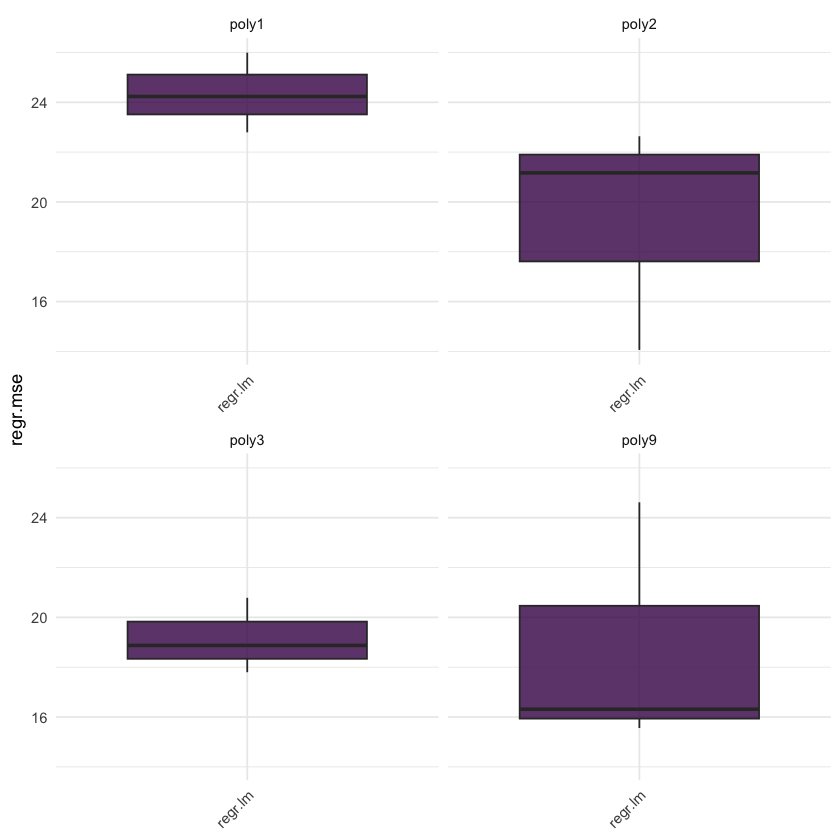

In [16]:
library(ggplot2)
autoplot(bmr) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Interpretation:**

- Models with higher degrees may have lower training error but higher test error due to overfitting.
- Cross-validation helps estimate the test error to select the best model.



## Task 3

### Question

Apply the k-nearest neighbors model with `horsepower` and `weight` as inputs and `origin` as the target. Split the data into a train and test sample, train models with different values of `k`, extract predictions from these models, and compare them graphically on the test data.


### Solution

#### Loading Necessary Libraries


In [17]:
library(caret)        # For KNN

Loading required package: lattice



In [18]:
x <- Auto[, c("horsepower", "weight")]
y <- as.factor(Auto$origin)

#### Visualizing the Data

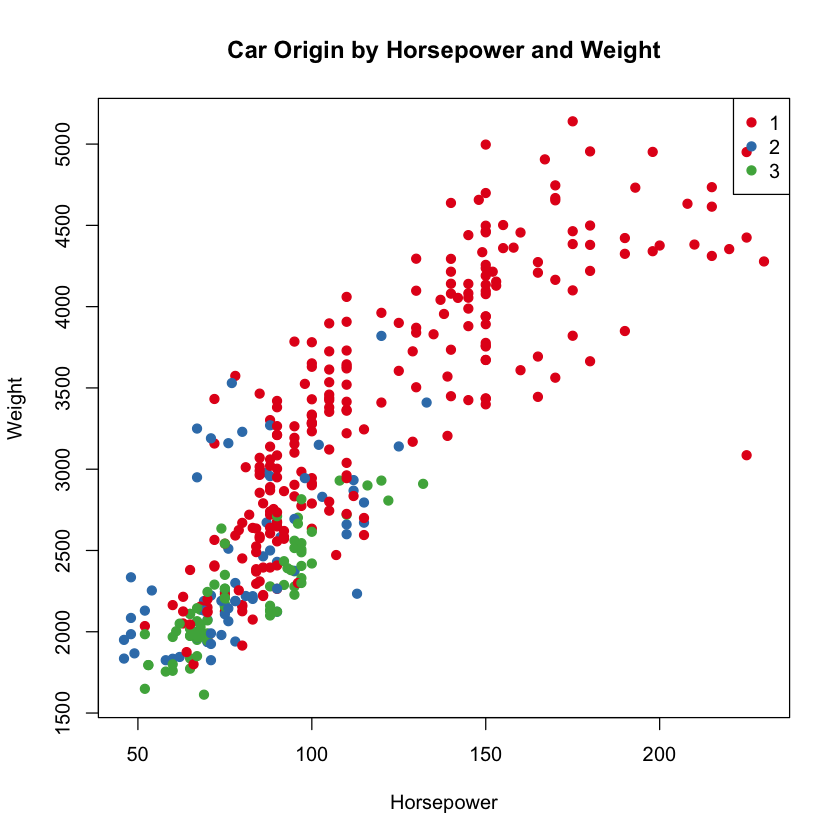

In [19]:
colours <- brewer.pal(3, "Set1")
plot(x, col = colours[y], pch = 19, xlab = "Horsepower", ylab = "Weight", main = "Car Origin by Horsepower and Weight")
legend("topright", legend = levels(y), col = colours, pch = 19)

**Explanation:**

- The plot visualizes the distribution of car origins in the feature space.
- It helps in understanding the separability of classes.

#### Splitting the Data into Training and Test Sets

In [20]:
set.seed(100)
train_idx <- sample(seq_len(nrow(Auto)), size = floor(0.67 * nrow(Auto)))
x_train <- x[train_idx, ]
y_train <- y[train_idx]
x_test <- x[-train_idx, ]
y_test <- y[-train_idx]

#### Training KNN Models with Different k Values


In [21]:
k_values <- c(1, 3, 10, 25)
knn_models <- list()

for (k in k_values) {
    knn_models[[paste0("k", k)]] <- knn3(x_train, y_train, k = k)
}

#### Making Predictions on the Test Set

In [22]:
predictions <- list()

for (k in k_values) {
    model <- knn_models[[paste0("k", k)]]
pred <- predict(model, x_test, type = "class")
predictions[[paste0("k", k)]] <- pred
}

#### Evaluating the Models

We compute the classification accuracy for each k.

In [23]:
accuracy <- sapply(predictions, function(pred) {
    mean(pred == y_test)
})
print(accuracy)

       k1        k3       k10       k25 
0.7230769 0.6538462 0.6923077 0.7153846 



**Interpretation:**

- Accuracy varies with different values of `k`.
- Smaller `k` may lead to overfitting, while larger `k` may underfit.

#### Visualizing the Predictions


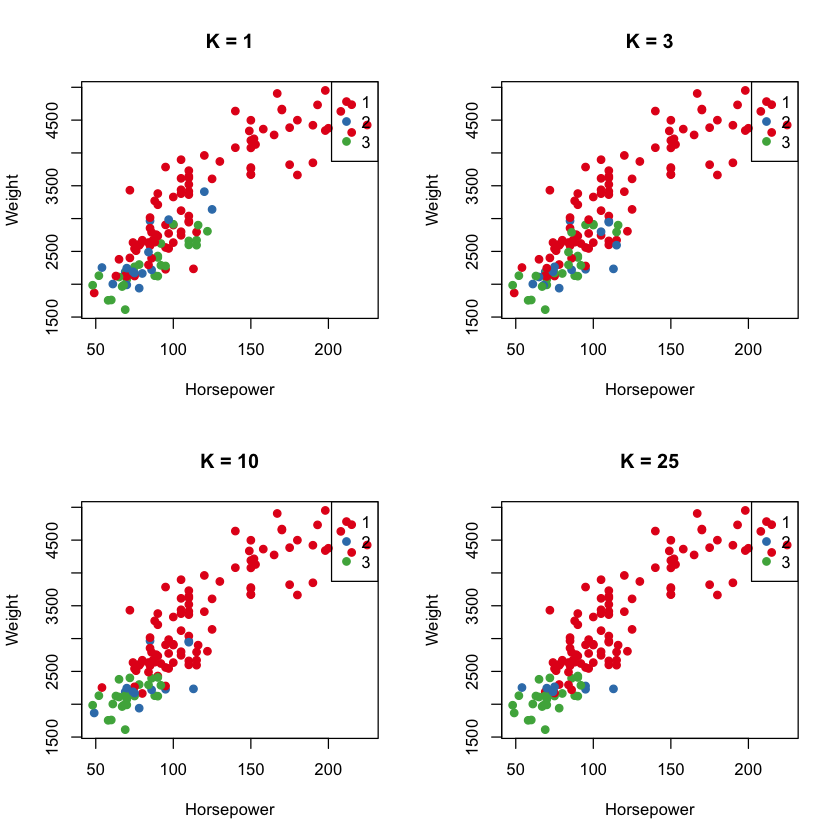

In [24]:
par(mfrow = c(2, 2))
for (k in k_values) {
    pred <- predictions[[paste0("k", k)]]
plot(x_test, col = colours[pred], pch = 19, xlab = "Horsepower", ylab = "Weight", main = paste("K =", k))
legend("topright", legend = levels(y), col = colours, pch = 19)
}
par(mfrow = c(1, 1))


**Explanation:**

- The plots show how the predicted class labels change with different `k`.
- Visual comparison aids in understanding the model's performance spatially.

#### Alternative Method for Computing Accuracy

We define a function for classification accuracy.


In [25]:
calc_class_accuracy <- function(actual, predicted) {
    mean(actual == predicted)
}

Calculating accuracy using the function:

In [26]:
for (k in k_values) {
    pred <- predictions[[paste0("k", k)]]
acc <- calc_class_accuracy(y_test, pred)
cat("Accuracy for k =", k, ":", round(acc, 4), "\n")
}

Accuracy for k = 1 : 0.7231 
Accuracy for k = 3 : 0.6538 
Accuracy for k = 10 : 0.6923 
Accuracy for k = 25 : 0.7154 



## Conclusion

In this assignment, we:

- Explored polynomial regression models of different degrees to predict `mpg` based on `horsepower`.
- Used cross-validation to select the best polynomial degree, balancing model complexity and generalization.
- Applied KNN classification to predict the origin of cars using `horsepower` and `weight`.
- Observed how varying `k` affects the KNN model's performance, illustrating the bias-variance trade-off.

**Key Takeaways:**

- **Model Complexity:** Higher-degree polynomials can fit training data better but may overfit, leading to poor test performance.
- **Cross-Validation:** Essential for estimating test error and selecting models that generalize well.
- **KNN Sensitivity:** The choice of `k` in KNN significantly impacts model bias and variance.
